# 30. TETRA CLUSTER: DATA EXPLORATION
---

## 1. Introducing the Data
- **Source**: Ultsch, A.: Clustering with SOM: U*C,
    - In Proc. Workshop on Self-Organizing Maps, Paris, France, 2005, 75-82.

    - Web: https://www.uni-marburg.de/fb12/arbeitsgruppen/datenbionik/data

    - One of the datasets in the Fundamental Clustering Problems Suite (FCPS).

    - `labels0` come from the Author. `0` denotes the noise class (if present).
- **Authors info on dataset**: 
    - Tetra, n = 400, 
    - dimension = 3, 
    - classes = 4, 
    - `main problem: almost touching clusters`
- **Downloaded from:** https://github.com/gagolews/clustering_benchmarks_v1/tree/master/fcps

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

cols = ['col1', 'col2', 'col3']
tetra = pd.read_csv('data/tetra.data.gz', 
                    delimiter="\t", header=None)
labels = pd.read_csv('data/tetra.labels0.gz', 
                    delimiter="\t", header=None)
tetra.columns = cols
tetra['labels'] = labels
print(tetra.shape)
tetra.head()

(400, 4)


,col1,col2,col3,labels
0,1.295,0.051,-0.385,1
1,1.409,-0.035,-0.252,1
2,1.097,0.246,-0.415,1
3,1.463,0.265,-0.513,1
4,1.603,0.081,-0.470,1


## 2. Understanding Data Types

In [2]:
tetra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    400 non-null    float64
 1   col2    400 non-null    float64
 2   col3    400 non-null    float64
 3   labels  400 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


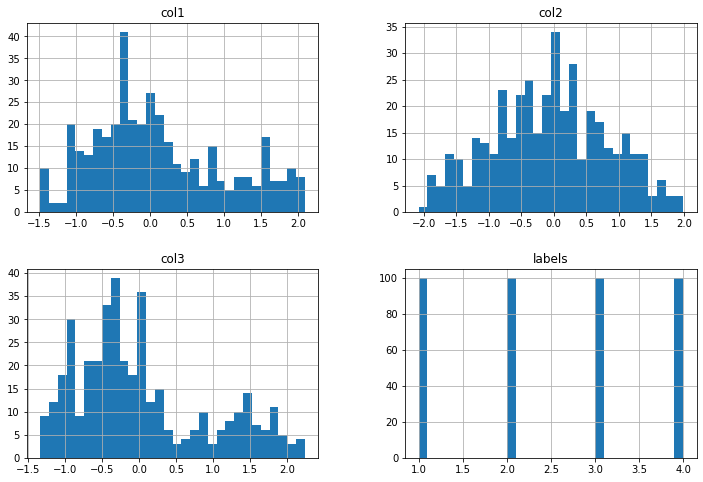

In [4]:
import matplotlib.pyplot as plt

tetra.hist(bins=30, figsize=(12,8))
plt.show()

In [5]:
labels.value_counts()

4    100
3    100
2    100
1    100
dtype: int64

## 3. Checking for Outliers

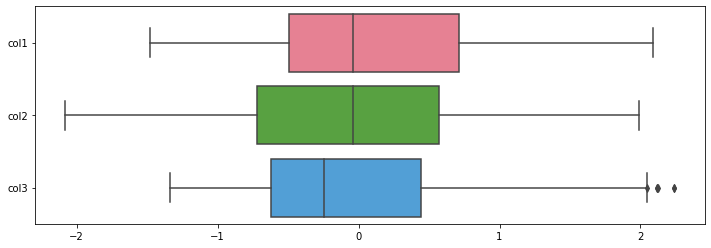

In [8]:
import seaborn as sns

X = tetra.drop('labels', axis=1)
plt.figure(figsize=(12,4))
ax = sns.boxplot(data=X, orient="h", palette="husl")

## 4. Exploring Correlation

<AxesSubplot:>

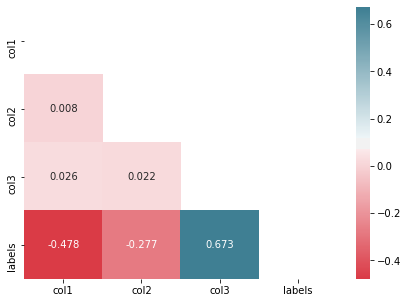

In [9]:
corr_mx = tetra.corr()
mask = np.triu(np.ones_like(corr_mx, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr_mx, mask=mask, cmap=color, annot=True, 
            fmt=".3f", annot_kws={"size": 10})